In [ ]:
from google.colab import files
tsv_file = files.upload()

Saving 2018-E-c-En-dev.txt to 2018-E-c-En-dev.txt
Saving 2018-E-c-En-test-gold.txt to 2018-E-c-En-test-gold.txt
Saving 2018-E-c-En-train.txt to 2018-E-c-En-train.txt


# New Section

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import requests  
file_url = "http://nlp.stanford.edu/data/glove.6B.zip"
    
r = requests.get(file_url, stream = True)  
with open("/content/gdrive/My Drive/GloVe/glove.6B.zip", 'wb') as f:
  for chunk in r.iter_content(chunk_size=1024 * 8):
    if chunk:
        f.write(chunk)
        f.flush()  
#with open("/content/gdrive/My Drive/GloVe") as location:  
    
    #for block in r.iter_content(chunk_size = 1024): 
    #     if block:  
    #         file.write(block) 

In [ ]:
!pip install emoji
!pip install scikit-multilearn

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=53365be302122b465464a804575c0dc5f7f1d900708ae195e24c63cf1ce2c9bd
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
     |████████████████████████████████| 92kB 3.5MB/s 


Install required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import emoji
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train_data= pd.read_csv("2018-E-c-En-train.txt", sep="\t", header=0)
dev_data= pd.read_csv("2018-E-c-En-dev.txt", sep="\t", header=0)
test_data= pd.read_csv("2018-E-c-En-test-gold.txt", sep="\t", header=0)


Show the number of emotions present in the tweets

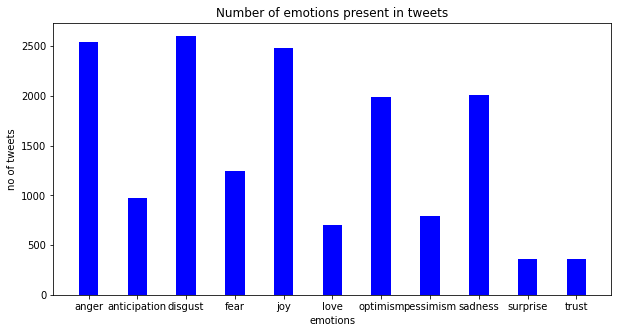

In [ ]:
emotions=list(train_data.head(0))
emotions = emotions[2:]
values=[]
for column in emotions:
    values.append(train_data[column].value_counts()[1])


fig = plt.figure(figsize = (10, 5)) 

# creating the bar plot 
plt.bar(emotions, values, color ='blue',width = 0.4)
plt.ylabel("no of tweets") 
plt.xlabel("emotions") 
plt.title("Number of emotions present in tweets") 
plt.show()  

cleaning the text an performing lematization

In [ ]:
def clean_text(text):
  lemmatizer = WordNetLemmatizer()
  text = text.lower()
  """make text url free"""
  text = re.sub(r'http\S+',"",text)

  """changing emoji to text"""
  for word in text:
      if word in emoji.UNICODE_EMOJI:
          text = re.sub(r'('+word+')', emoji.demojize(word).replace('_',' ')+' ', text)

  """removing punctuations like  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
  cleaned_text = text.translate(str.maketrans('','',string.punctuation))
  """lemmatization"""
  cleaned_text= " ".join([lemmatizer.lemmatize(word) for word in cleaned_text.split()])
  return(cleaned_text)


In [ ]:
for ind in train_data.index: 
      train_data.loc[ind,'Tweet']= clean_text(train_data['Tweet'][ind])
for ind in dev_data.index: 
      dev_data.loc[ind,'Tweet']= clean_text(dev_data['Tweet'][ind])
for ind in test_data.index: 
      test_data.loc[ind,'Tweet']= clean_text(test_data['Tweet'][ind])


In [ ]:
#del df2["ID"]
del train_data["ID"]
del dev_data["ID"]
del test_data["ID"]


In [ ]:
"""combined_data2 = pd.concat([train_data,test_data])
combined_data2.head()
combined_data2.shape
#tra_data['Tweet'][16615]
#test_data.head()
#dev_data.head()

(10097, 13)

# Using Keras

In [ ]:
from numpy import array
#from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
#from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
#from keras.layers.merge import Concatenate

In [ ]:
train_text = train_data["Tweet"]
test_text = test_data["Tweet"]

train_labels = train_data[emotions]
test_labels = test_data[emotions]
#train_labels.head()
#train_text.head()
#test_labels.head()
test_text.head()

0    @Adnan__786__ @AsYouNotWish Dont worry Indian ...
1    Academy of Sciences, eschews the normally sobe...
2                    I blew that opportunity -__- #mad
3               This time in 2 weeks I will be 30... 😥
4    #Deppression is real. Partners w/ #depressed p...
Name: Tweet, dtype: object

In [ ]:
#train data
X_train = []
sentences = list(train_text)
for sen in sentences:
    X_train.append(sen)

y_train = train_labels.values
#test data
X_test = []
sentences = list(test_text)
for sen in sentences:
    X_test.append(sen)

y_test = test_labels.values

tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

NameError: ignored

In [ ]:
import zipfile
with zipfile.ZipFile('/content/gdrive/My Drive/GloVe/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/gdrive/My Drive/GloVe')

glove embedding

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/gdrive/My Drive/GloVe/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

create model

In [ ]:
deep_inputs = Input(shape=(maxlen,))
#x=1
#deep_inputs = Input(shape=(x,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(11, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 200, 100)          1583000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_5 (Dense)              (None, 11)                1419      
Total params: 1,701,667
Trainable params: 118,667
Non-trainable params: 1,583,000
_________________________________________________________________
None


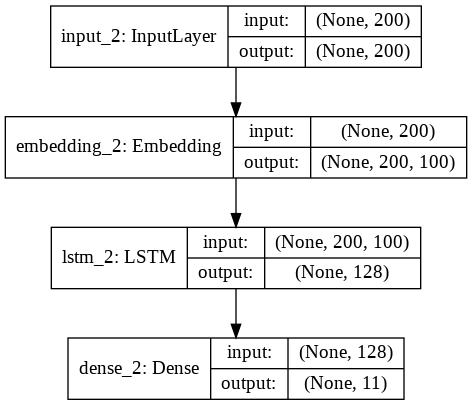

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

start training

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 5470 samples, validate on 1368 samples
Epoch 1/5
5470/5470 [==============================] - 37s 7ms/step - loss: 0.5216 - acc: 0.7794 - val_loss: 0.4734 - val_acc: 0.7853
Epoch 2/5
5470/5470 [==============================] - 36s 7ms/step - loss: 0.4708 - acc: 0.7870 - val_loss: 0.4721 - val_acc: 0.7853
Epoch 3/5
5470/5470 [==============================] - 36s 7ms/step - loss: 0.4708 - acc: 0.7870 - val_loss: 0.4721 - val_acc: 0.7853
Epoch 4/5
5470/5470 [==============================] - 35s 6ms/step - loss: 0.4707 - acc: 0.7870 - val_loss: 0.4725 - val_acc: 0.7853
Epoch 5/5
5470/5470 [==============================] - 40s 7ms/step - loss: 0.4706 - acc: 0.7870 - val_loss: 0.4724 - val_acc: 0.7853


In [ ]:
test score

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3259/3259 [==============================] - 6s 2ms/step
Test Score: 0.48135467969628704
Test Accuracy: 0.7804959416389465


training representation

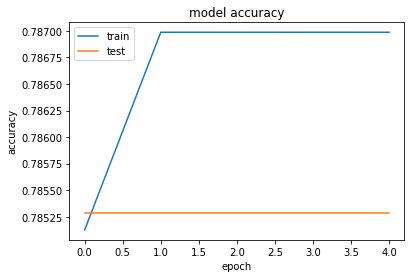

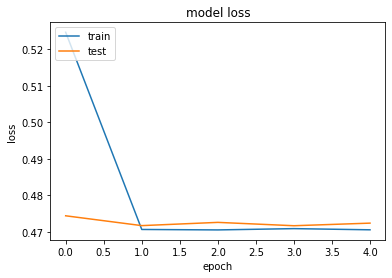

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
text = clean_text("i trust you")
print(f"Text used: {text}")
text = tokenizer.texts_to_sequences([text])
text = pad_sequences(text, padding='post', maxlen=maxlen)
result=model.predict(text)

for i in range(len(emotions)):
  print(f"{emotions[i]}:{round(result[0][i]*100,2)} %")

Text used: i trust you
anger:39.9 %
anticipation:12.89 %
disgust:39.72 %
fear:19.86 %
joy:34.01 %
love:10.26 %
optimism:26.48 %
pessimism:12.09 %
sadness:29.69 %
surprise:5.22 %
trust:5.3 %


# ONEvsREST classification model 

Vectorization

In [ ]:
train_text = train_data["Tweet"]
test_text = test_data["Tweet"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
#transform vetor
x_train = vectorizer.transform(train_text)
y_train = train_data.drop(labels = ['Tweet'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test_data.drop(labels = ['Tweet'], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
sum = 0
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for emotion in emotions:
    print('**Processing {} comments...**'.format(emotion))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train_data[emotion])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    #print(prediction)
    #print(prediction.shape)
    print('Test accuracy is {}%'.format(accuracy_score(test_data[emotion], prediction)*100))
    sum = sum + accuracy_score(test_data[emotion], prediction) * 100
    print("\n")
sum = sum/11
print(f"average accuracy:{sum}")

**Processing anger comments...**
Test accuracy is 71.55569193003988%


**Processing anticipation comments...**
Test accuracy is 86.95918993556305%


**Processing disgust comments...**
Test accuracy is 69.83737342743173%


**Processing fear comments...**
Test accuracy is 85.39429272783062%


**Processing joy comments...**
Test accuracy is 70.23626879410863%


**Processing love comments...**
Test accuracy is 84.5044492175514%


**Processing optimism comments...**
Test accuracy is 67.10647437864375%


**Processing pessimism comments...**
Test accuracy is 88.49340288432035%


**Processing sadness comments...**
Test accuracy is 72.47621969929426%


**Processing surprise comments...**
Test accuracy is 94.81436023320036%


**Processing trust comments...**
Test accuracy is 95.3053083768027%


average accuracy:80.60754832770787


predicting a text

In [ ]:
cleaned_text=clean_text(input("enter the tweet:"))
text = [cleaned_text]
x_text = vectorizer.transform(text)

for emotion in emotions:
  LogReg_pipeline.fit(x_train, train_data[emotion])
  prediction = LogReg_pipeline.predict(x_text)
  if prediction[0] == 1:
    print(f"{emotion}")


enter the tweet:i love everyone
joy
love
optimism


# Binary Relevance

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,predictions))

sytem crashes after all the ram is used

# Classifier Chains

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

classifier = ClassifierChain(LogisticRegression())
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

execution was taking too much time

# Label Powerset

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(LogisticRegression())
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

session crashed after using all available ram

# Adapted Algorithm

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
classifier_new.fit(x_train, y_train)
predictions_new = classifier_new.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

took too long to train 

In [ ]:
cleaned_text=clean_text(r"I'm doing all this to make sure you smiling down on me bro")
data = {'text':cleaned_text}
#testdf = pd.DataFrame(data,index=[0])
#vectorizer.fit(testdf)
#cleaned_text = vectorizer.transform(testdf)
for emotion in emotions:
  LogReg_pipeline.fit(x_train, train_data[emotion])
  prediction = LogReg_pipeline.predict(cleaned_text)
  if prediction > 0.5:
    print("1")
  else :
    print("0")

In [ ]:
prediction.predict("I'm doing all this to make sure you smiling down on me bro")